**Importing Required Libraries**

In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from scipy.stats import zscore
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


In [402]:
df=pd.read_csv("C:/Users/hpsli/Favorites/Downloads/Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


<h1>Data Cleaning<h1>

In [403]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [405]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [406]:
df.shape

(1014, 7)

In [407]:
# Check for missing values
df.isnull().sum()


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [408]:
# Handle missing values 
df = df.dropna()
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [409]:
# Remove duplicates
df = df.drop_duplicates(ignore_index=True)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
447,12,100,50,6.4,98.0,70,mid risk
448,15,100,60,6.0,98.0,80,low risk
449,15,100,49,7.6,98.0,77,low risk
450,12,100,50,6.0,98.0,70,mid risk


<h1>**Data Preprocessing**<h1>

In [410]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['RiskLevel']))  

# Prepare the final dataset
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])  
y = df['RiskLevel']

In [411]:
numeric_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df[numeric_cols] = df[numeric_cols].apply(zscore)

# Display Z-scores (optional, to verify the calculation)
print(df)

          Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0   -0.305021    1.089310     0.333484  2.354439 -0.491351   1.479009   
1    0.422139    1.649455     1.061321  1.646744 -0.491351  -0.484676   
2   -0.014157   -1.151273    -0.394352 -0.122492  0.927758   0.742627   
3    0.058559    1.649455     0.697402 -0.476340 -0.491351  -0.484676   
4    0.422139    0.529164    -1.122188 -0.794802 -0.491351   0.251706   
..        ...         ...          ...       ...       ...        ...   
447 -1.250328   -0.591127    -1.850025 -0.688648 -0.491351  -0.484676   
448 -1.032180   -0.591127    -1.122188 -0.830187 -0.491351   0.742627   
449 -1.032180   -0.591127    -1.922808 -0.264031 -0.491351   0.374436   
450 -1.250328   -0.591127    -1.850025 -0.830187 -0.491351  -0.484676   
451 -0.595885   -0.591127    -1.850025 -0.547109 -0.491351  -1.711980   

     RiskLevel  
0    high risk  
1    high risk  
2    high risk  
3    high risk  
4     low risk  
..         ...  
447 

***Outlier Detection***

In [412]:
df_numerical = df.drop(columns=['RiskLevel'])
data_types = df_numerical.dtypes
print(data_types)
df_numerical = df_numerical[(np.abs(stats.zscore(df_numerical)) < 3).all(axis=1)]
df_numerical

Age            float64
SystolicBP     float64
DiastolicBP    float64
BS             float64
BodyTemp       float64
HeartRate      float64
dtype: object


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.305021,1.089310,0.333484,2.354439,-0.491351,1.479009
1,0.422139,1.649455,1.061321,1.646744,-0.491351,-0.484676
2,-0.014157,-1.151273,-0.394352,-0.122492,0.927758,0.742627
3,0.058559,1.649455,0.697402,-0.476340,-0.491351,-0.484676
4,0.422139,0.529164,-1.122188,-0.794802,-0.491351,0.251706
...,...,...,...,...,...,...
447,-1.250328,-0.591127,-1.850025,-0.688648,-0.491351,-0.484676
448,-1.032180,-0.591127,-1.122188,-0.830187,-0.491351,0.742627
449,-1.032180,-0.591127,-1.922808,-0.264031,-0.491351,0.374436
450,-1.250328,-0.591127,-1.850025,-0.830187,-0.491351,-0.484676


***Standardize the data***

In [413]:
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_numerical)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_numerical.columns)
df_scaled

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.277878,1.149703,0.368914,3.135495,-0.479245,1.602005
1,0.458188,1.723546,1.104674,2.235886,-0.479245,-0.549961
2,0.016549,-1.145671,-0.366846,-0.013136,1.065190,0.795018
3,0.090155,1.723546,0.736794,-0.462940,-0.479245,-0.549961
4,0.458188,0.575859,-1.102606,-0.867764,-0.479245,0.257026
...,...,...,...,...,...,...
422,-1.234763,-0.571828,-1.838366,-0.732823,-0.479245,-0.549961
423,-1.013944,-0.571828,-1.102606,-0.912745,-0.479245,0.795018
424,-1.013944,-0.571828,-1.911942,-0.193058,-0.479245,0.391524
425,-1.234763,-0.571828,-1.838366,-0.912745,-0.479245,-0.549961


<h1>**Exploratory Data Analysis**<h1>

In [414]:

def num_plot(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    cmap = plt.get_cmap('Blues')
    risk_order = ['low risk', 'mid risk', 'high risk'] 
    p_colors = {'low risk': cmap(0.2), 'mid risk':cmap(0.5) , 'high risk': cmap(0.9)}


    sns.histplot(data=df, x=col, kde=True, ax=ax[0],hue='RiskLevel', hue_order=risk_order, palette=p_colors)
    sns.boxplot(data=df, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

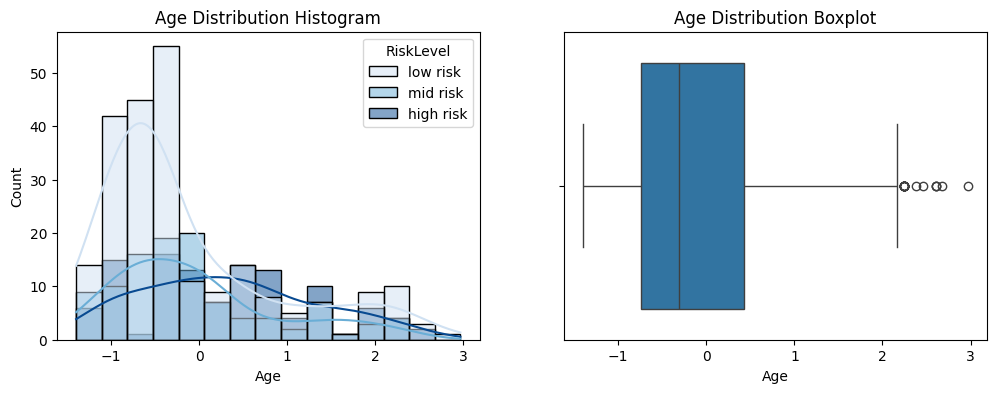

In [415]:
num_plot(df,"Age")

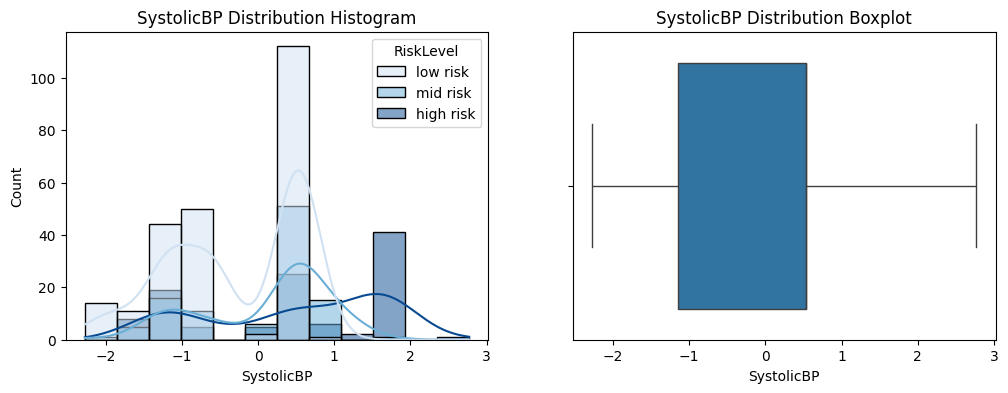

In [416]:
num_plot(df,"SystolicBP")

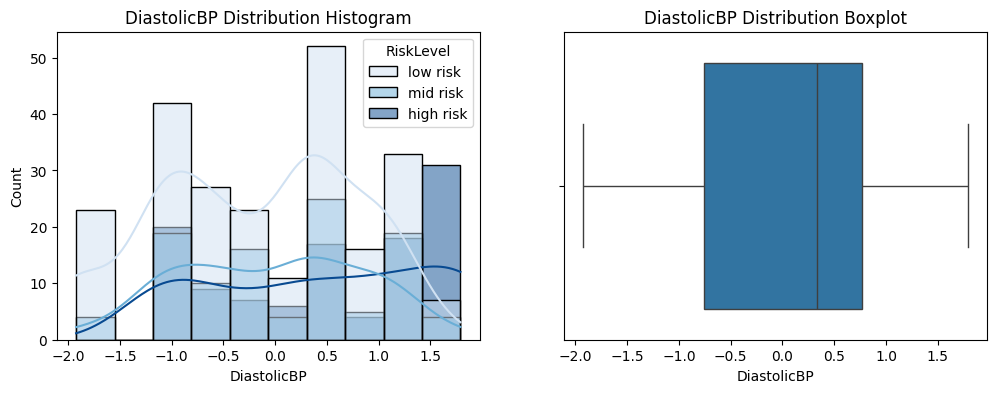

In [417]:
num_plot(df,"DiastolicBP")

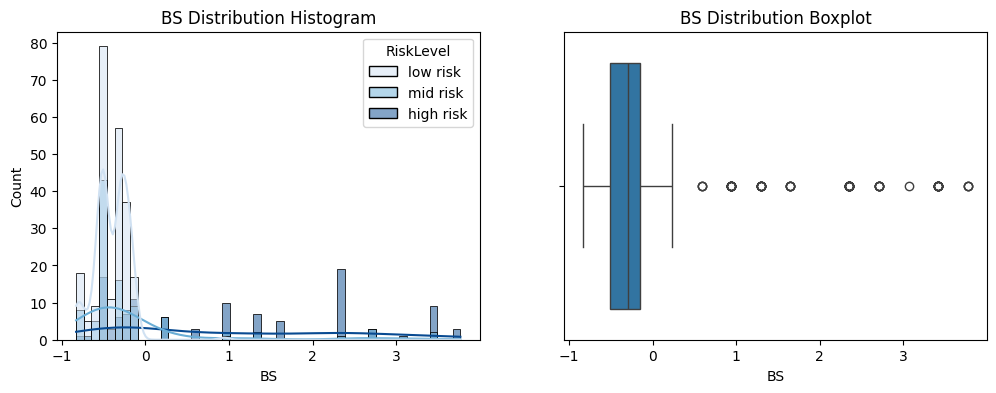

In [418]:
num_plot(df,"BS")

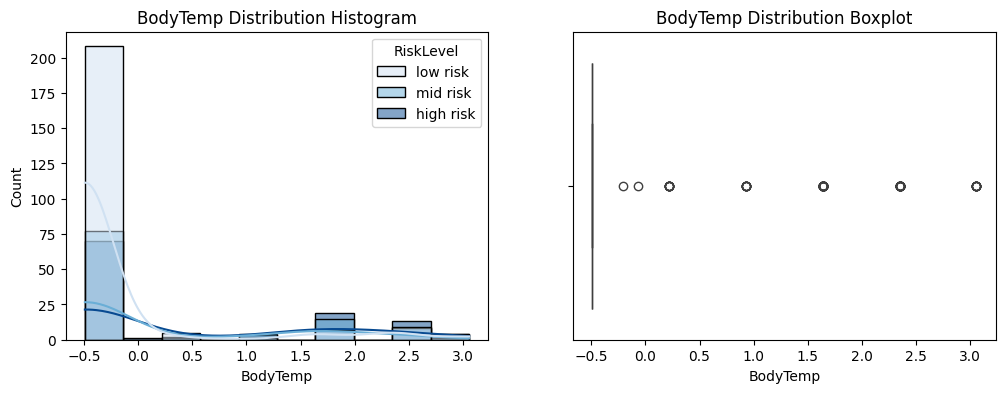

In [419]:
num_plot(df,"BodyTemp")

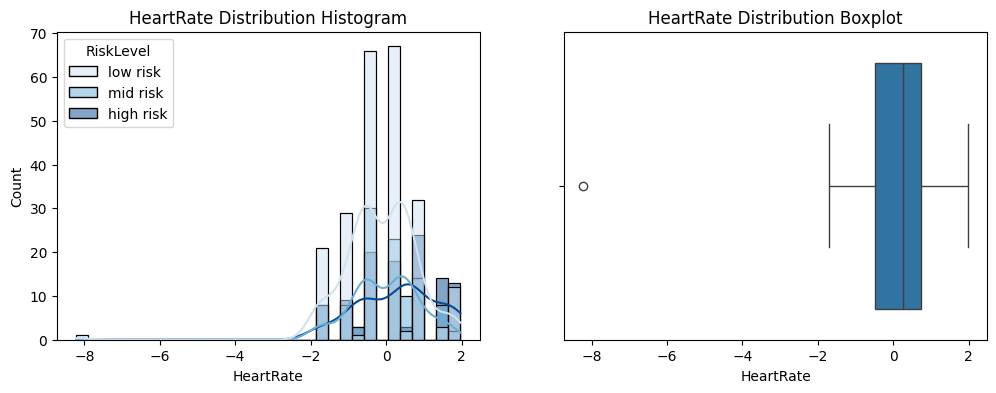

In [420]:
num_plot(df,"HeartRate")

In [421]:
numeric_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
df[numeric_cols] = df[numeric_cols].apply(zscore)

# Display Z-scores (optional, to verify the calculation)
print(df)


          Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  \
0   -0.305021    1.089310     0.333484  2.354439 -0.491351   1.479009   
1    0.422139    1.649455     1.061321  1.646744 -0.491351  -0.484676   
2   -0.014157   -1.151273    -0.394352 -0.122492  0.927758   0.742627   
3    0.058559    1.649455     0.697402 -0.476340 -0.491351  -0.484676   
4    0.422139    0.529164    -1.122188 -0.794802 -0.491351   0.251706   
..        ...         ...          ...       ...       ...        ...   
447 -1.250328   -0.591127    -1.850025 -0.688648 -0.491351  -0.484676   
448 -1.032180   -0.591127    -1.122188 -0.830187 -0.491351   0.742627   
449 -1.032180   -0.591127    -1.922808 -0.264031 -0.491351   0.374436   
450 -1.250328   -0.591127    -1.850025 -0.830187 -0.491351  -0.484676   
451 -0.595885   -0.591127    -1.850025 -0.547109 -0.491351  -1.711980   

     RiskLevel  
0    high risk  
1    high risk  
2    high risk  
3    high risk  
4     low risk  
..         ...  
447 

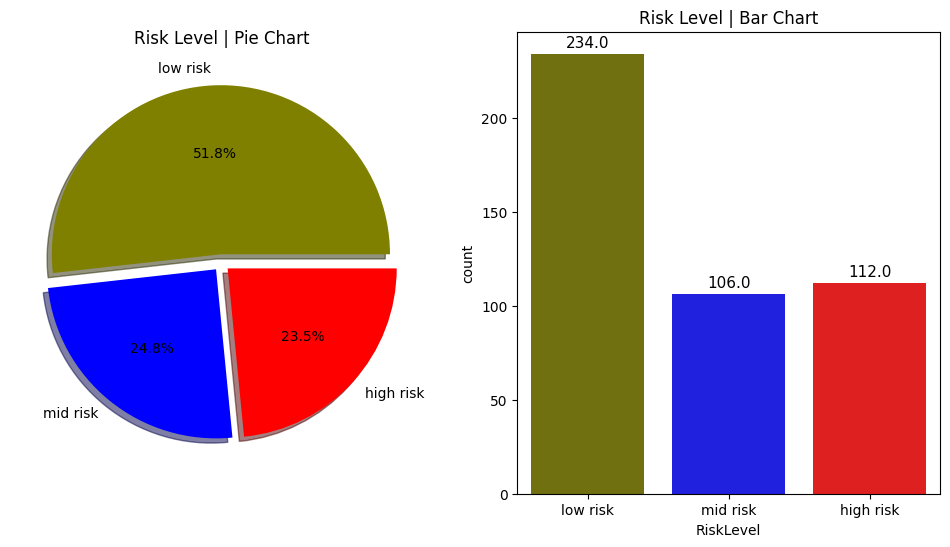

In [422]:
p_colors = ['olive', 'blue', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level | Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level | Bar Chart")
plt.show()

**Feature Importance**

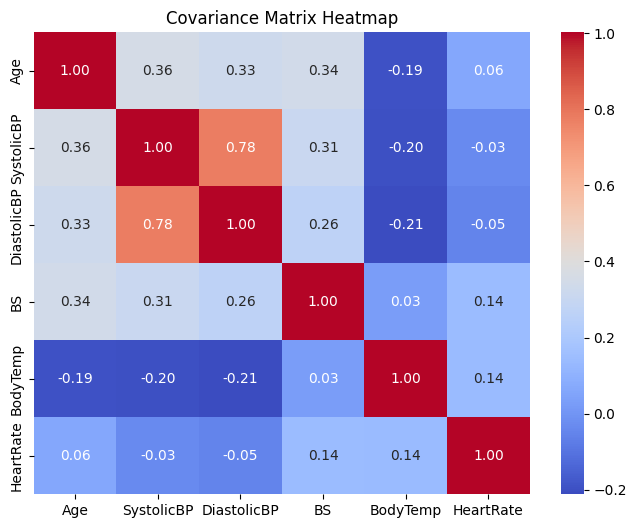

In [423]:
cov_matrix = df_scaled.cov()
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

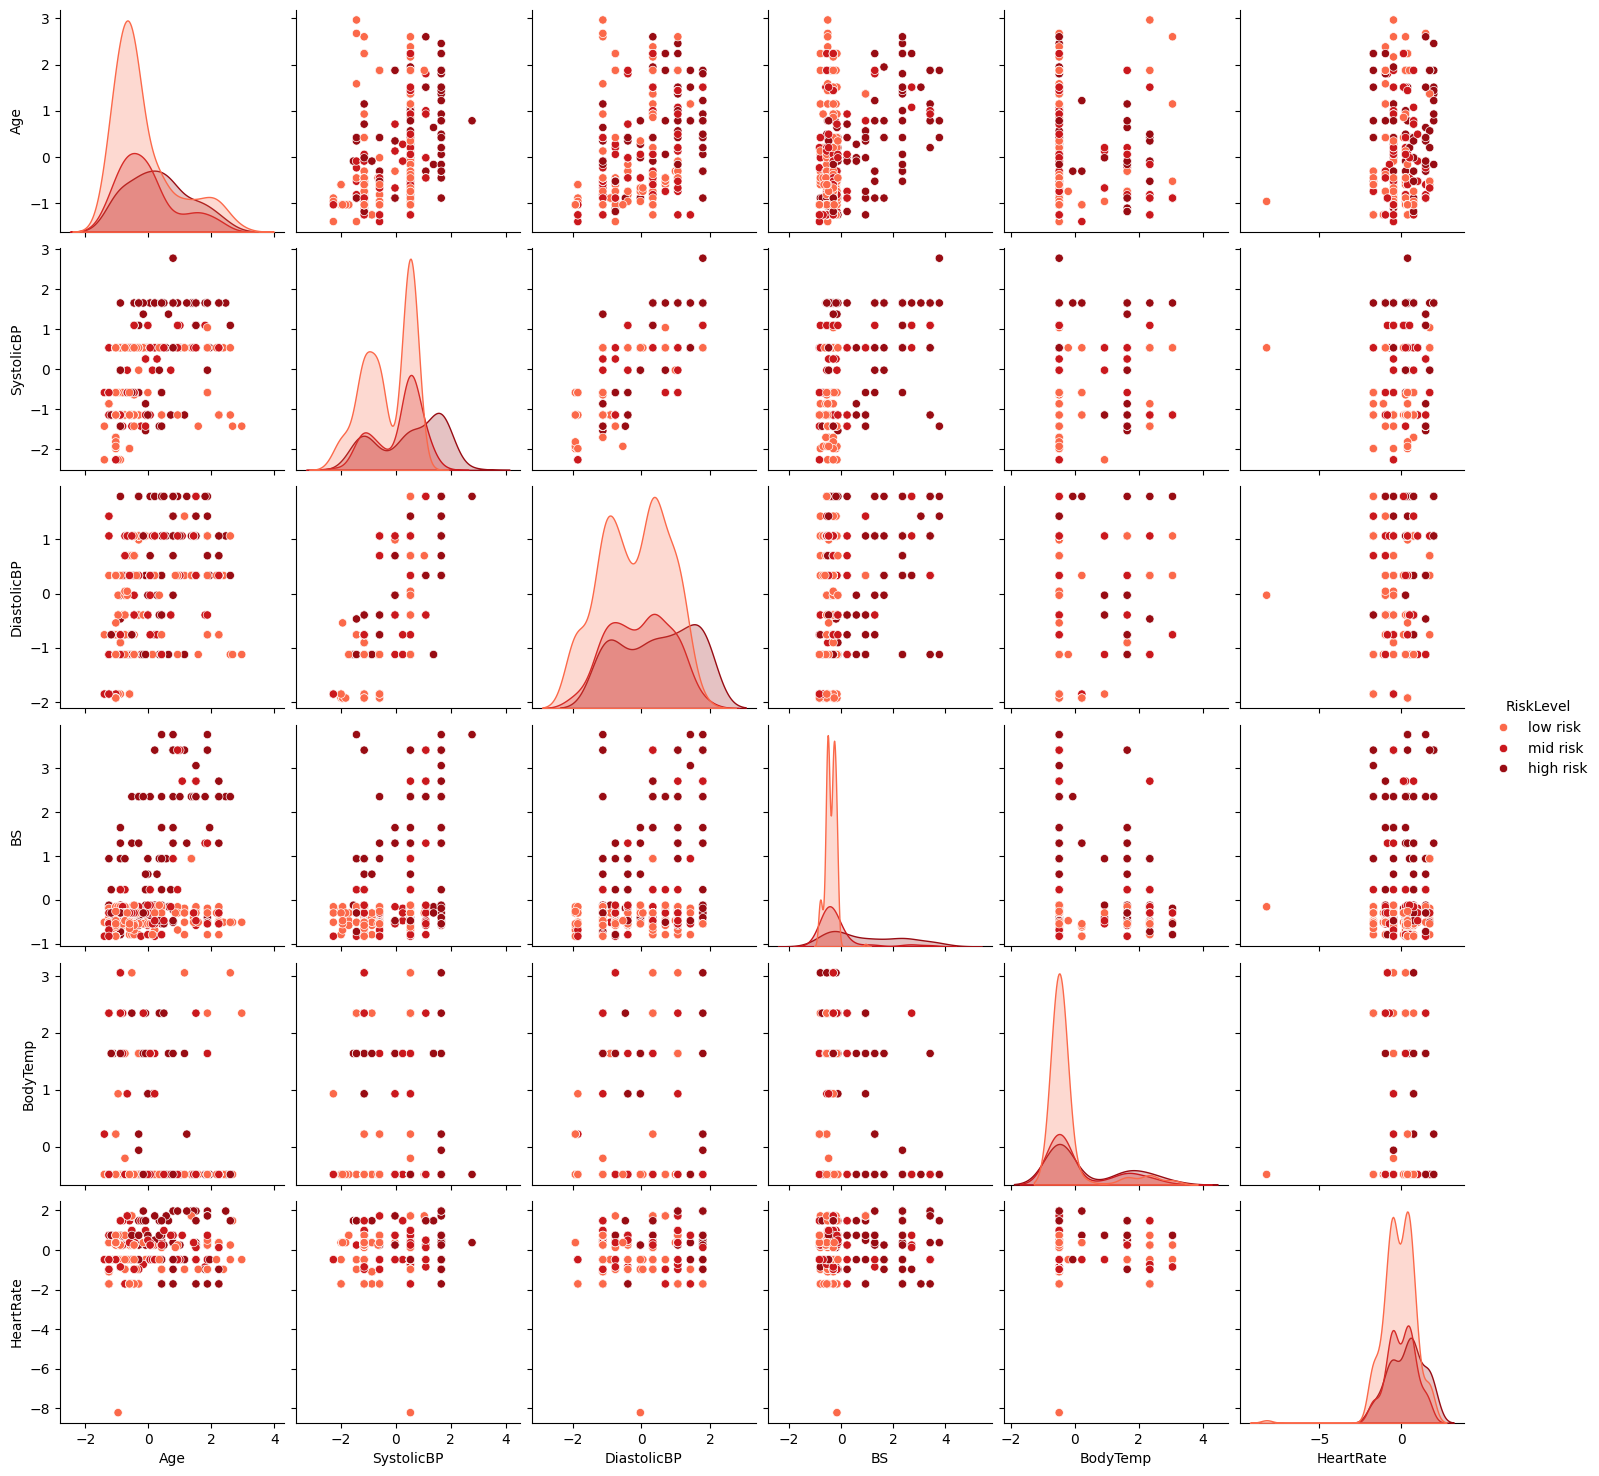

In [424]:
cmap = plt.get_cmap( 'Reds')
risk_order = ['low risk', 'mid risk', 'high risk'] # Example order
p_colors = {'low risk': cmap(0.5), 'mid risk':cmap(0.75) , 'high risk': cmap(0.9)} # Example palette
sns.pairplot(df, hue='RiskLevel', hue_order=risk_order, palette=p_colors)
plt.show()

**Feature Selection**

Linear Regression Coefficients:
Age           -0.031546
SystolicBP     0.205985
DiastolicBP   -0.005963
BS             0.399149
BodyTemp       0.261963
HeartRate      0.072422
dtype: float64


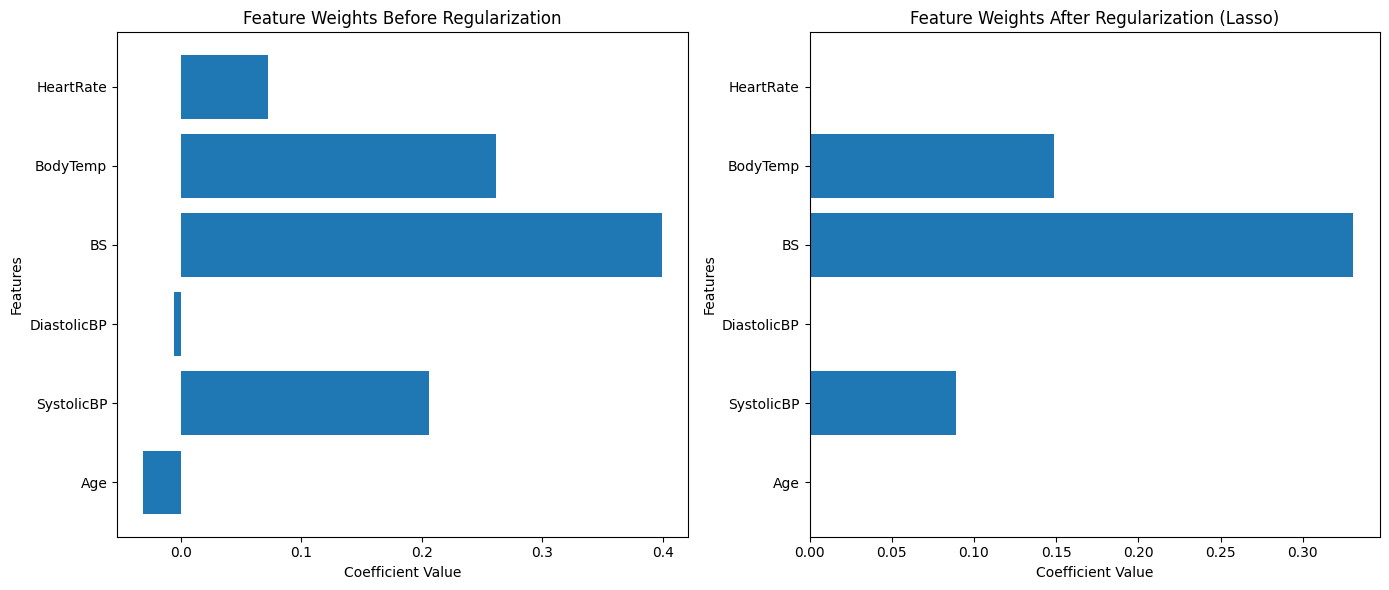

In [425]:
# Mapping RiskLevel to numeric values
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
#df_filtered['RiskLevel'] = df_filtered['RiskLevel'].map(risk_mapping)

# Handling any potential typos in the RiskLevel column
df_filtered = df_filtered.dropna(subset=['RiskLevel'])

# Features and target variable
X = df_filtered.drop(columns='RiskLevel')
y = df_filtered['RiskLevel'].map(risk_mapping)
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Fit Linear Regression model (before regularization)
linear_model = LinearRegression()
linear_model.fit(X_scaled, y)
linear_coefficients = pd.Series(linear_model.coef_, index=X.columns)

# Apply Lasso Regression (after regularization)
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso.fit(X_scaled, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Plotting the coefficients before and after regularization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before regularization
ax[0].barh(X.columns, linear_coefficients)
ax[0].set_title('Feature Weights Before Regularization')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Features')

# After regularization
ax[1].barh(X.columns, lasso_coefficients)
ax[1].set_title('Feature Weights After Regularization (Lasso)')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Features')

# Print the coefficients to inspect the differences
print("Linear Regression Coefficients:")
print(linear_coefficients)

plt.tight_layout()
plt.show()

**Feature selection using random forest classifier**

In [426]:
X = df.drop('RiskLevel', axis=1)  # Independent variables
y = df['RiskLevel']  # Dependent variable

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

selector = SelectFromModel(clf, threshold="mean")
selector.fit(X, y)

selected_features = X.columns[selector.get_support(indices=True)]
df = df[selected_features]
print(df)

     SystolicBP        BS
0      1.089310  2.354439
1      1.649455  1.646744
2     -1.151273 -0.122492
3      1.649455 -0.476340
4      0.529164 -0.794802
..          ...       ...
447   -0.591127 -0.688648
448   -0.591127 -0.830187
449   -0.591127 -0.264031
450   -0.591127 -0.830187
451   -0.591127 -0.547109

[452 rows x 2 columns]


**Model Selection**

Accuracy: 0.81
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.75      0.80        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203

              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.75      0.80        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203

Confusion Matrix:
[[40  1  6]
 [ 3 60 17]
 [ 3  9 64]]


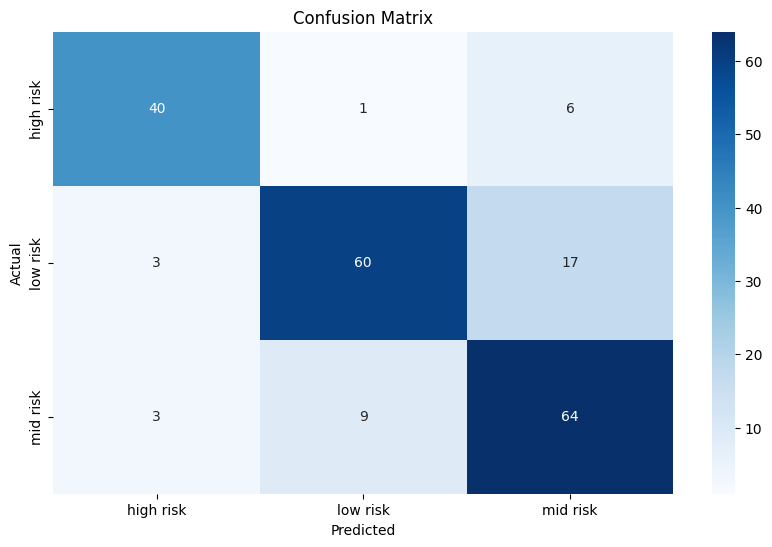

In [427]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for Random Forest, but we'll do it to maintain consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Random Forest classifier
n_estimators = 100  # You can choose any number of trees
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))
# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.67
              precision    recall  f1-score   support

   high risk       0.78      0.89      0.83        47
    low risk       0.61      0.86      0.71        80
    mid risk       0.74      0.34      0.47        76

    accuracy                           0.67       203
   macro avg       0.71      0.70      0.67       203
weighted avg       0.70      0.67      0.65       203

              precision    recall  f1-score   support

   high risk       0.78      0.89      0.83        47
    low risk       0.61      0.86      0.71        80
    mid risk       0.74      0.34      0.47        76

    accuracy                           0.67       203
   macro avg       0.71      0.70      0.67       203
weighted avg       0.70      0.67      0.65       203

Confusion Matrix:
[[42  3  2]
 [ 4 69  7]
 [ 8 42 26]]


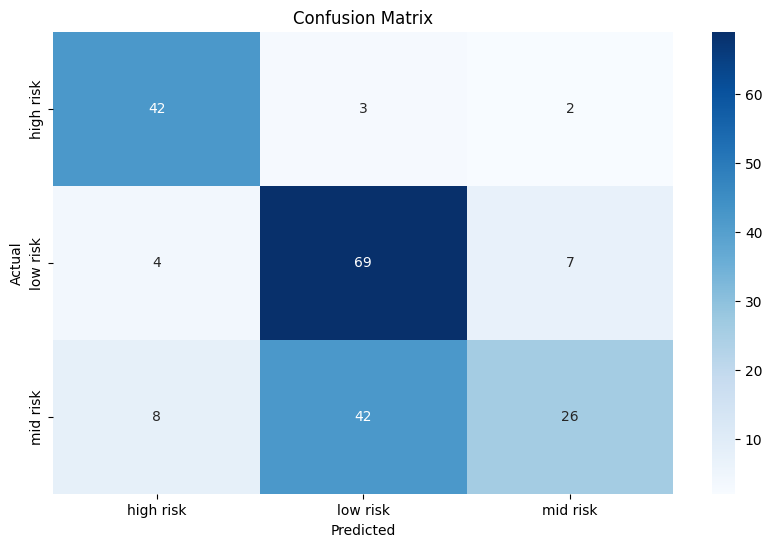

In [428]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))
# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.65
              precision    recall  f1-score   support

   high risk       0.70      0.85      0.77        47
    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203

Confusion Matrix:
[[40  2  5]
 [ 4 71  5]
 [13 42 21]]


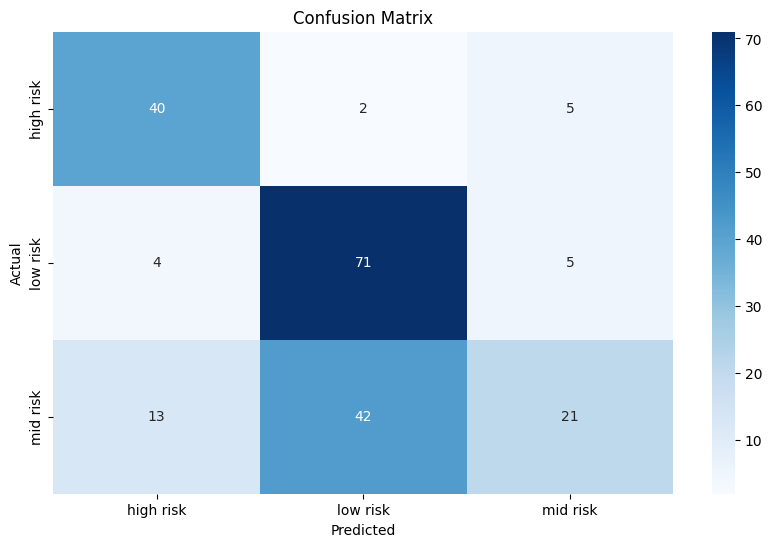

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.84
              precision    recall  f1-score   support

   high risk       0.85      0.87      0.86        47
    low risk       0.87      0.82      0.85        80
    mid risk       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.87      0.82      0.85        80
           2       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[41  1  5]
 [ 4 66 10]
 [ 3  9 64]]


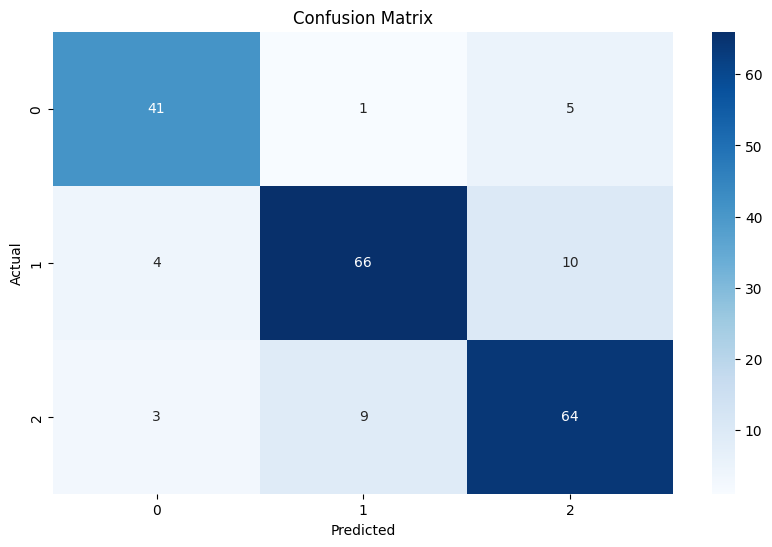

In [430]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for XGBoost, but we'll do it to maintain consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the XGBoost classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.64
              precision    recall  f1-score   support

   high risk       0.75      0.81      0.78        47
    low risk       0.60      0.72      0.66        80
    mid risk       0.61      0.45      0.52        76

    accuracy                           0.64       203
   macro avg       0.65      0.66      0.65       203
weighted avg       0.64      0.64      0.63       203

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        47
           1       0.60      0.72      0.66        80
           2       0.61      0.45      0.52        76

    accuracy                           0.64       203
   macro avg       0.65      0.66      0.65       203
weighted avg       0.64      0.64      0.63       203

Confusion Matrix:
[[38  4  5]
 [ 5 58 17]
 [ 8 34 34]]


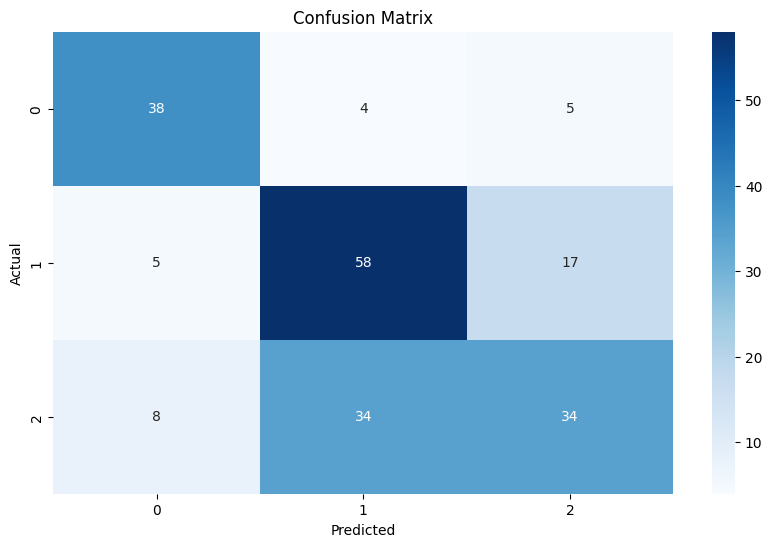

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional for KNN, but we'll do it to maintain consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose any number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Best Parameters found by Grid Search:
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}
Best Accuracy found by Grid Search:
0.8076351874629856
Accuracy: 0.84
              precision    recall  f1-score   support

   high risk       0.85      0.85      0.85        47
    low risk       0.87      0.84      0.85        80
    mid risk       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[40  1  6]
 [ 4 67  9]
 [ 3  9 64]]


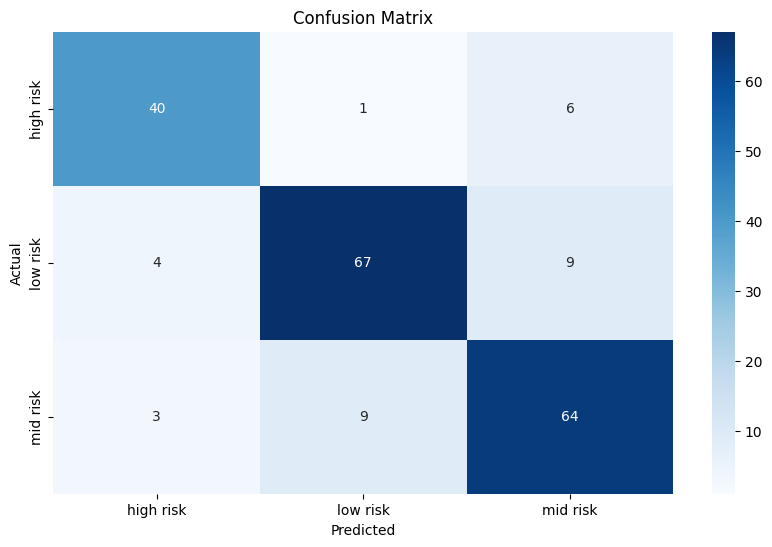

In [433]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best Accuracy found by Grid Search:")
print(grid_search.best_score_)

# Use the best estimator found by GridSearchCV
best_xgb_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h1>**Highest Accuracy Model Selection**<h1>

Accuracy: 0.86
              precision    recall  f1-score   support

   high risk       0.94      0.96      0.95       272
    low risk       0.94      0.92      0.93       406
    mid risk       0.89      0.90      0.90       336

    accuracy                           0.92      1014
   macro avg       0.92      0.93      0.92      1014
weighted avg       0.92      0.92      0.92      1014

Confusion Matrix:
[[260   4   8]
 [  5 372  29]
 [ 12  20 304]]


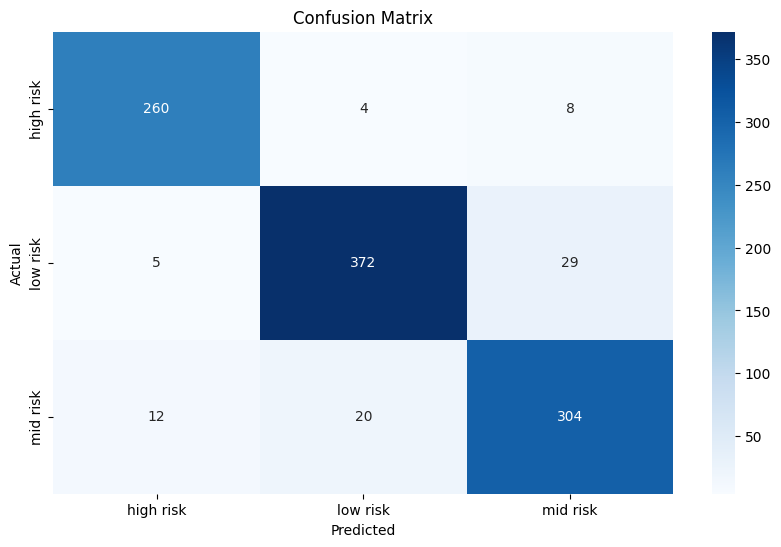

In [441]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features (optional for Random Forest, but we'll do it to maintain consistency)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=skf, scoring='accuracy')

# Print average accuracy across folds
print(f'Accuracy: {cv_scores.mean():.2f}')

# Optionally fit the model on the entire dataset
# rf_classifier.fit(X, y)

# Predict on the entire dataset
y_pred_all = rf_classifier.fit(X, y).predict(X)

# Print classification report
print(classification_report(y, y_pred_all, target_names=label_encoder.classes_))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_all)

# Print confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h1>**Model Deployment using Gradio**<h1>

In [7]:
import gradio as gr
print(gr.__version__)


4.37.2


In [30]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import gradio as gr

# Load the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=skf, scoring='accuracy')

# Print average accuracy across folds
print(f'Accuracy: {cv_scores.mean():.2f}')

# Fit the model on the entire dataset
rf_classifier.fit(X, y)

# Predict function for Gradio
def predict(Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate):
    input_data = scaler.transform([[Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]])
    prediction = rf_classifier.predict(input_data)
    return label_encoder.inverse_transform(prediction)[0]

import gradio as gr
inputs = [
    gr.Slider(label="Age", info="Enter your age"),
    gr.Slider(minimum=70, maximum=160, step=1, label="Systolic Blood Pressure", info="Range: 70-160 mmHg", value=120),
    gr.Slider(minimum=49, maximum=100, step=1, label="Diastolic Blood Pressure", info="Range: 49-100 mmHg", value=80),
    gr.Slider(minimum=6, maximum=19, step=0.1, label="Blood Sugar (mmol/L)", info="Range: 6-19 mmol/L", value=8),
    gr.Slider(minimum=98, maximum=103, step=0.1, label="Body Temperature", info="Range: 98-103 °F", value=98.6),
    gr.Slider(minimum=60, maximum=90, step=1, label="Heart Rate", info="Range: 60-90 bpm", value=75)
]
outputs = gr.Label()
iface = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs=outputs,
    title="Maternal Health Risk Predictor",
    description=(
        "Empower your health decisions with the nurturing guidance of maternal wisdom, "
        "enhanced by advanced machine learning and data science. Uncover predictive insights "
        "using sacred health indicators, custom-tailored for precise maternal health risk assessment. "
        "Please note the input limits: Age (in years), Systolic BP (70-160 mmHg), Diastolic BP(49-100 mmHg), "
        "Blood Sugar (6-19 mmol/L),Body Temperature (98-103°F),Heart Rate(60-90 bpm)."
    ),
    theme="sketchy",
    
)

# Launch the interface locally
iface.launch(share=False)

Accuracy: 0.86


c:\Users\hpsli\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py:983: UserWarning: Cannot load sketchy. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/sketchy (Request ID: Root=1-6694dffb-793bb7286f3cd2d6685248fd;93b0808d-aa17-4355-9132-589096ddabb9)

Sorry, we can't find the page you are looking for.
  else:


Running on local URL:  http://127.0.0.1:7881

To create a public link, set `share=True` in `launch()`.


c:\Users\hpsli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\hpsli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\hpsli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
